<a href="https://colab.research.google.com/github/kiranraou/Python-Projects/blob/main/Deep_Learning_A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Image Denoising using Autoencoder**

**Fashion MNIST Dataset**

**Problem Statement**

The dataset is similar to MNIST but includes images of specific clothing and accessory. The objective is to add some noise to the images and then use an Autoencoder to denoise those images

**Datasets**

*Total Images: 70,000

*Train Images: 60,000

*Test Images: 10,000

*Image Size: 28 x 28

*Classes: ‘T-Shirt/top’, ‘Trouser’, ‘Pullover’, ‘Dress’, ‘Coat’, ‘Sandal’, ‘Shirt’, ‘Sneaker’, ‘Bag’, ‘Ankle Boot’

Dataset source = Link to download: https://github.com/zalandoresearch/fashion-mnist

**Importing Libraries**

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

**Loading dataset**

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, t_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

**Adding some noise to the images and Visualization**

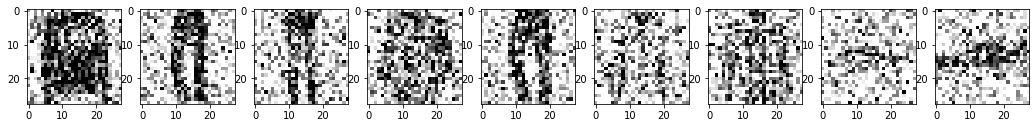

In [ ]:
#adding some noise
noise_factor = 0.45
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#Displaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
plt.show()

**Building model**

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))

In [ ]:
model.add(MaxPooling2D((2, 2), padding='same'))

In [ ]:
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

**Model Summary**

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 8)         2312      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 4, 4, 8)          

In [ ]:
model.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, 
          validation_data=(x_test_noisy, x_test))

Epoch 1/10
235/235 [==============================] - 34s 13ms/step - loss: 0.0467 - val_loss: 0.0284
Epoch 2/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0267 - val_loss: 0.0256
Epoch 3/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0247 - val_loss: 0.0241
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0236 - val_loss: 0.0233
Epoch 5/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0228 - val_loss: 0.0224
Epoch 6/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0221 - val_loss: 0.0219
Epoch 7/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0217 - val_loss: 0.0217
Epoch 8/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0213 - val_loss: 0.0212
Epoch 9/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0210 - val_loss: 0.0209
Epoch 10/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0207 - val_l

**Denoised Images**

In [ ]:
model.evaluate(x_test_noisy, x_test)

model.save('denoising_autoencoder.model')

313/313 [==============================] - 1s 2ms/step - loss: 0.0207
INFO:tensorflow:Assets written to: denoising_autoencoder.model/assets


In [ ]:
no_noise_img = model.predict(x_test_noisy)

**Summary of images shows before and after the noise the images**

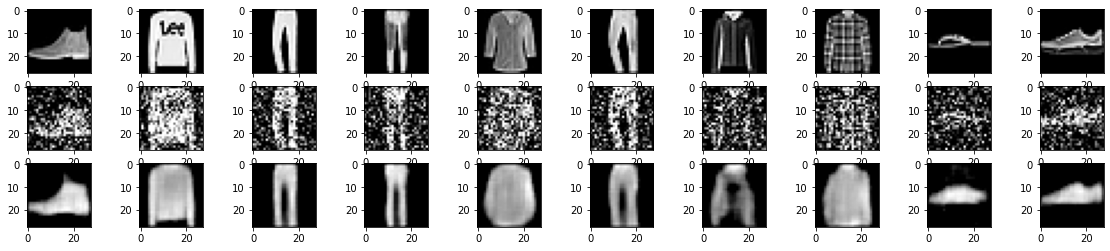

In [ ]:
plt.figure(figsize=(40, 4))
for i in range(10):
    #before noise
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    
    # display original
    ax = plt.subplot(3, 20, 20 +i+ 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(28, 28), cmap="gray")

plt.show()
